In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загружаем данные

In [2]:
data = pd.read_csv('music_genre.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
data.columns[1:]

Index(['artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'music_genre'],
      dtype='object')

## Сделаем в них пропуски

### Процент пропусков (т.е. процент строк с пропусками)

In [5]:
empty_percent = 0.15

In [6]:
bad_rows_count = int(len(data)*0.15)
rows_count = len(data)
feathures_count = len(data.columns)

### Сделаем маску, где в случайных строках будет выбран случайный столбец

In [7]:
from numpy.random import default_rng

rng = default_rng()
bad_rows_ids = rng.choice(rows_count, size=bad_rows_count, replace=False)
bad_rows_ids

array([19441, 42600, 44260, ..., 39178, 24132, 25730], dtype=int64)

In [8]:
mask = np.full((rows_count, feathures_count), False)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
drop_feathures = np.random.randint(1, feathures_count, size=bad_rows_count) # 1 чтобы не убрать id
drop_feathures

array([ 4,  8,  3, ..., 14, 11, 12])

In [10]:
mask[bad_rows_ids, drop_feathures] = True
mask[bad_rows_ids[0], :]

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### Применим маску

In [11]:
data = data.where(~mask, None)

In [12]:
data.isnull().sum()

instance_id           5
artist_name         421
track_name          448
popularity          439
acousticness        421
danceability        470
duration_ms         438
energy              445
instrumentalness    436
key                 450
liveness            482
loudness            464
mode                431
speechiness         432
tempo               434
obtained_date       468
valence             430
music_genre         476
dtype: int64

### Нарисуем распределения

In [13]:
hist_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                'energy', 'instrumentalness', 'liveness', 'loudness', 
                'speechiness', 'valence']

array([[<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'valence'}>]], dtype=object)

<Figure size 1000x1000 with 0 Axes>

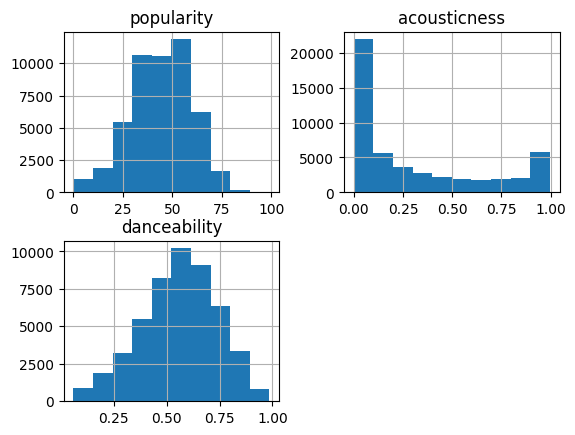

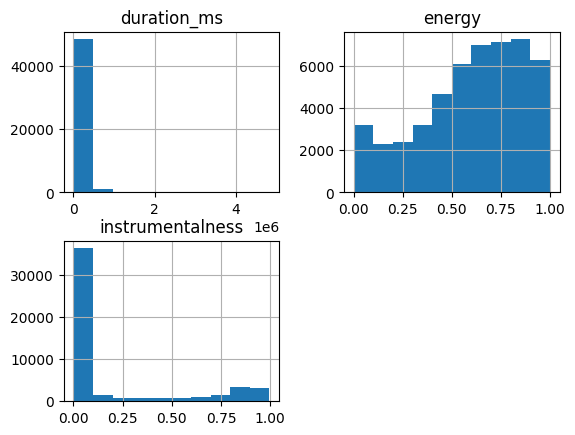

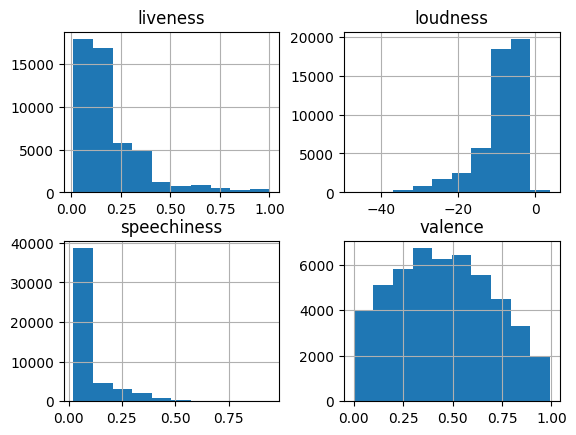

In [14]:
plt.figure(figsize=(10,10))
data[hist_columns[:3]].hist()
data[hist_columns[3:6]].hist()
data[hist_columns[6:]].hist()

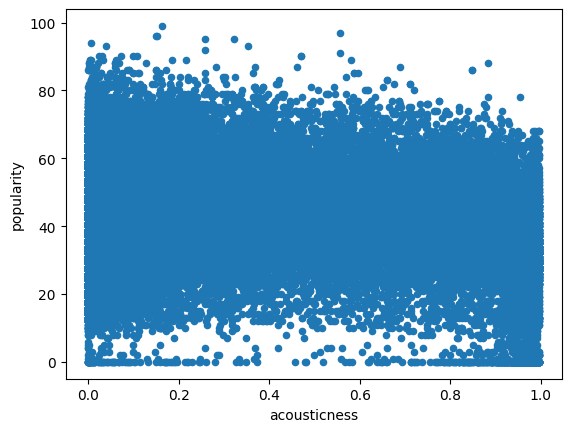

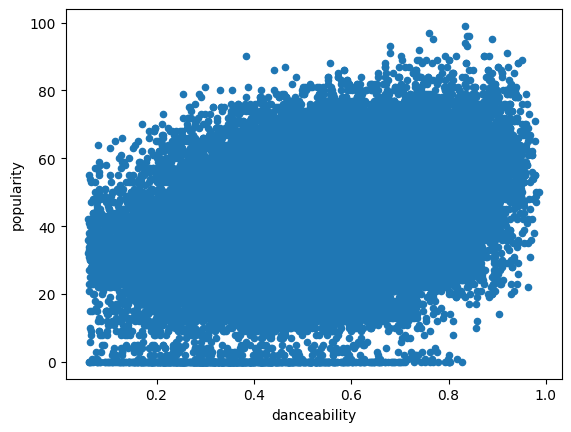

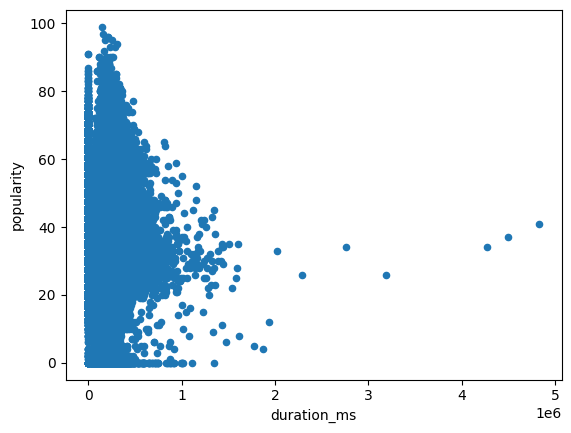

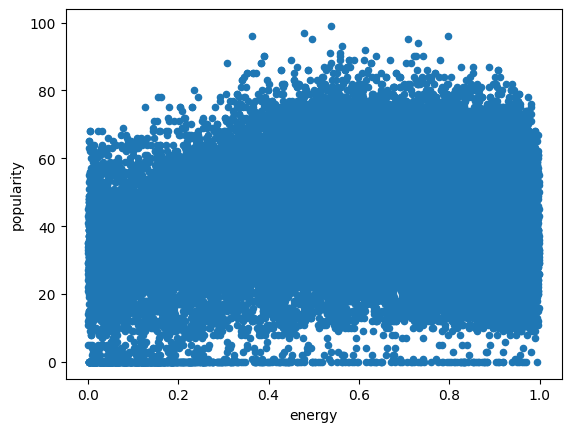

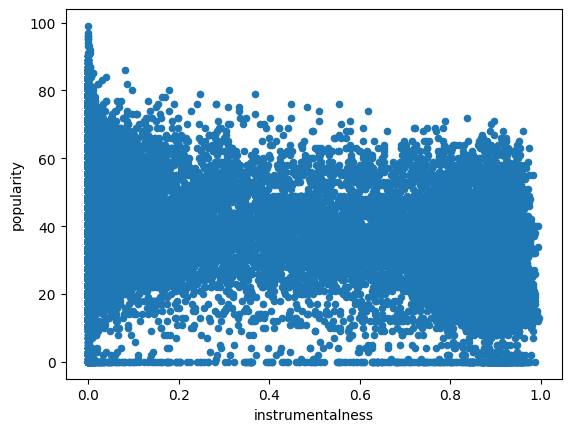

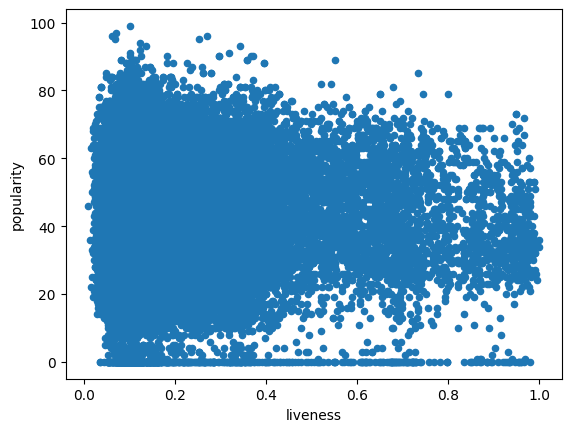

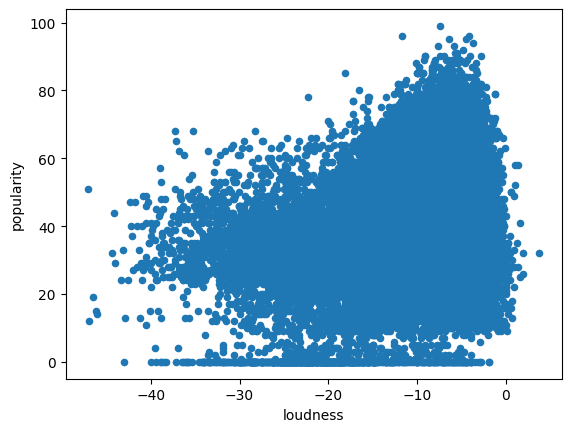

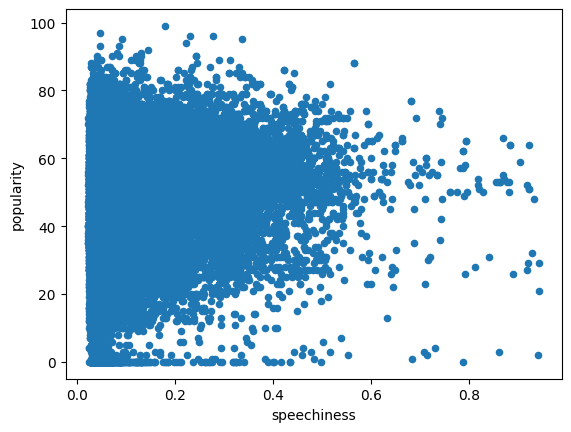

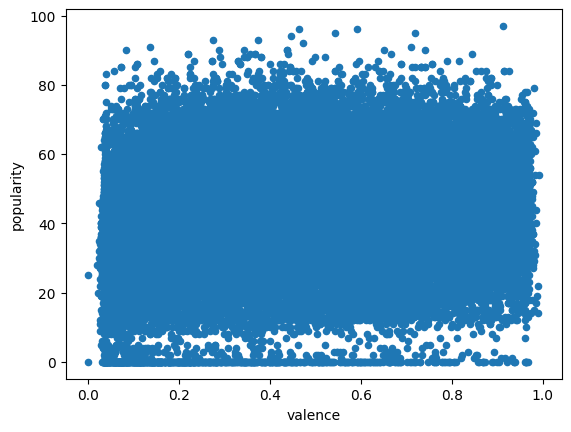

In [15]:
y_column = 'popularity'
for x_column in hist_columns[1:]:
    data.plot.scatter(x=x_column, y=y_column)
    plt.plot()

<BarContainer object of 10 artists>

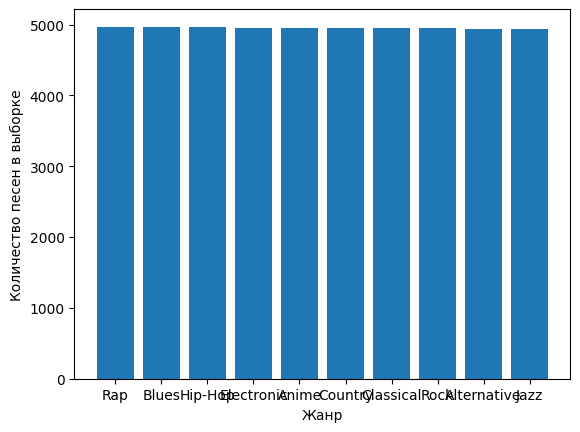

In [16]:
genres = data['music_genre'].value_counts()
plt.xlabel('Жанр')
plt.ylabel('Количество песен в выборке')
plt.bar(x=genres.index, height=genres.values)

<BarContainer object of 10 artists>

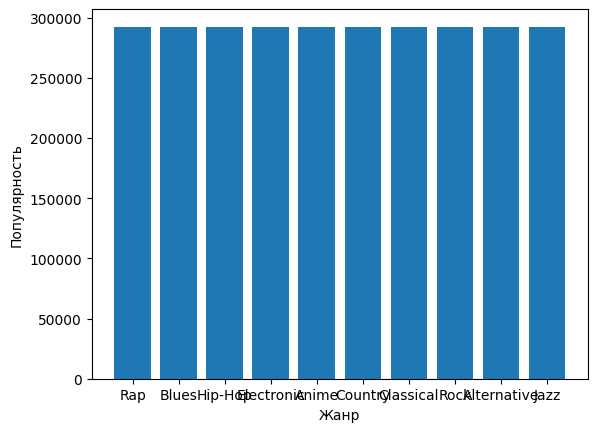

In [17]:
values = []
for genre in genres.index:
    values.append(data.loc[data['music_genre'] == 'Rock']['popularity'].sum())

plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.bar(x=genres.index, height=values)

popularity


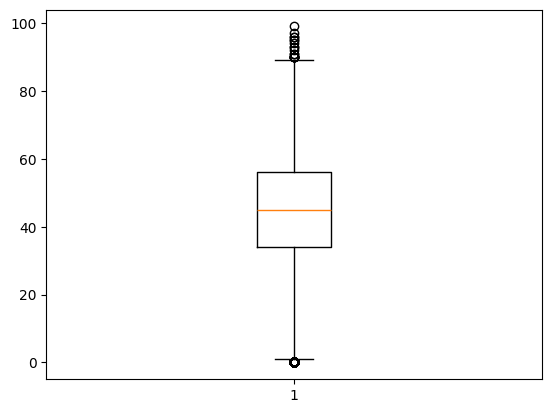

acousticness


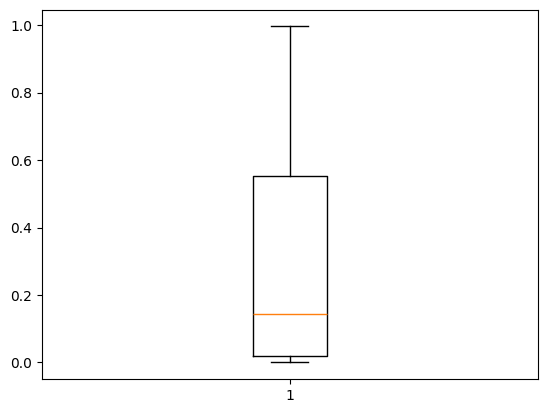

danceability


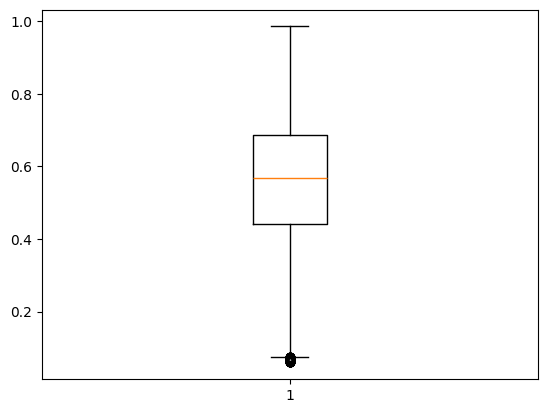

duration_ms


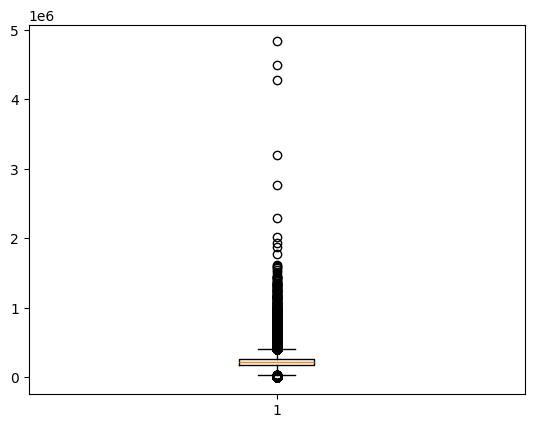

energy


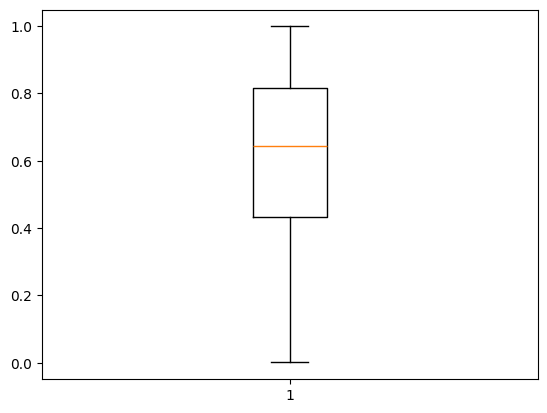

instrumentalness


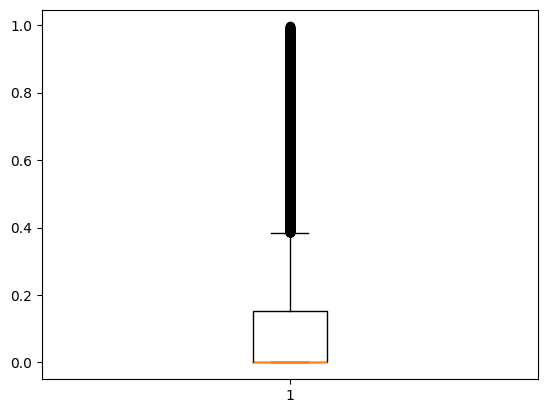

liveness


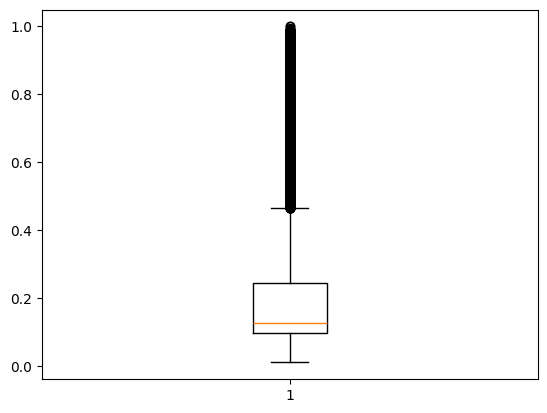

loudness


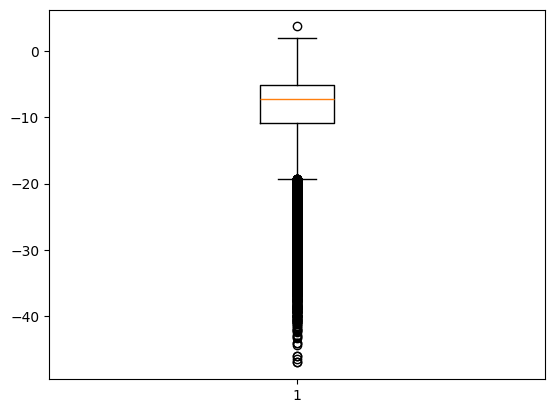

speechiness


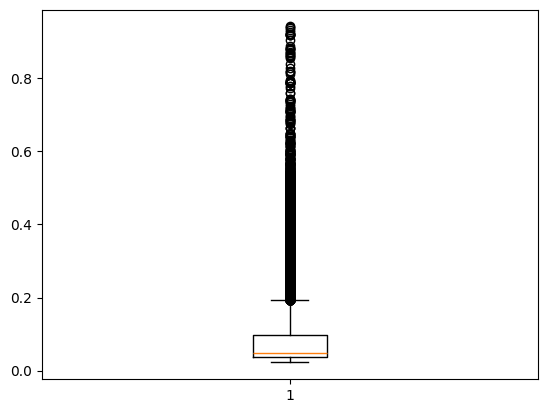

valence


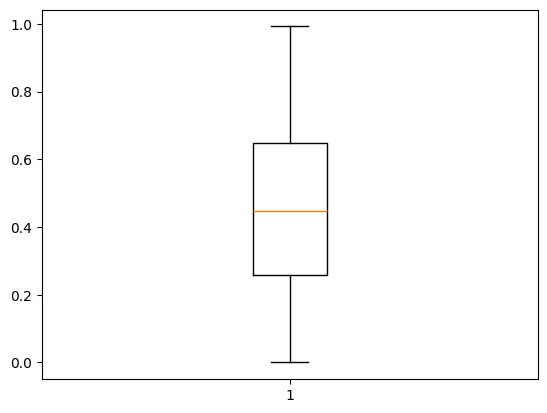

In [18]:
for column in hist_columns:
    print(column)
    plt.boxplot(data[column][~np.isnan(data[column])])
    plt.show()

# Очистка данных

In [194]:
data.dropna()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.90300,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,54580.0,Tee Grizzley,First Day Out,75.0,0.17100,0.587,254694.0,0.711,0.00000,C#,0.1250,-6.330,Major,0.4200,98.008,4-Apr,0.381,Hip-Hop
49998,64552.0,Logic,Growing Pains III,55.0,0.47400,0.514,246773.0,0.730,0.00000,E,0.5110,-8.491,Minor,0.3870,167.655,4-Apr,0.699,Hip-Hop
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.1190,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.1430,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop


<Axes: >

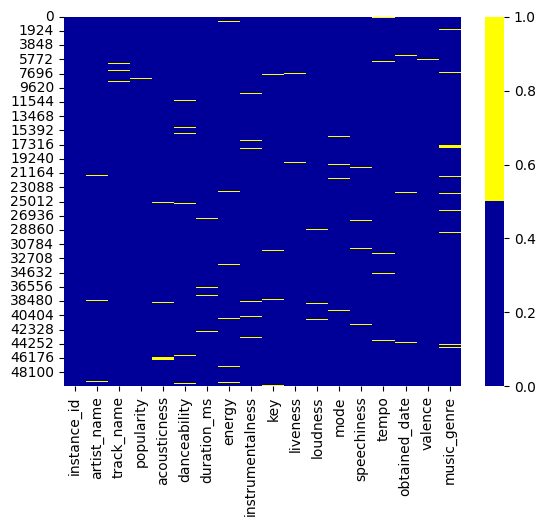

In [21]:
import seaborn as sns

cols = data.columns[:30]# первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [23]:
data[hist_columns].corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.289219,0.356656,-0.083355,0.216065,-0.364915,-0.039513,0.317730,0.223871,0.124995
acousticness,-0.289219,1.000000,-0.347808,0.062603,-0.791252,0.386838,-0.109627,-0.730193,-0.163902,-0.269633
danceability,0.356656,-0.347808,1.000000,-0.155845,0.264886,-0.300873,-0.051007,0.391335,0.279341,0.434206
duration_ms,-0.083355,0.062603,-0.155845,1.000000,-0.067525,0.130335,0.018883,-0.103312,-0.084156,-0.131036
energy,0.216065,-0.791252,0.264886,-0.067525,1.000000,-0.389860,0.187327,0.838264,0.158660,0.396670
instrumentalness,-0.364915,0.386838,-0.300873,0.130335,-0.389860,1.000000,-0.093178,-0.528610,-0.199042,-0.272733
liveness,-0.039513,-0.109627,-0.051007,0.018883,0.187327,-0.093178,1.000000,0.126529,0.115379,0.051946
loudness,0.317730,-0.730193,0.391335,-0.103312,0.838264,-0.528610,0.126529,1.000000,0.165606,0.339973
speechiness,0.223871,-0.163902,0.279341,-0.084156,0.158660,-0.199042,0.115379,0.165606,1.000000,0.059289
valence,0.124995,-0.269633,0.434206,-0.131036,0.396670,-0.272733,0.051946,0.339973,0.059289,1.000000
